In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import glob
warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd()
all_files = glob.glob(path + "/tabular-playground-series-aug-2022/*.csv")
filesnames = os.listdir('tabular-playground-series-aug-2022/')

In [3]:
all_files

['C:\\Users\\dongj\\Desktop\\Analysis_Visualization\\kaggle_analysis\\Tabular_Playground_Aug_22/tabular-playground-series-aug-2022\\sample_submission.csv',
 'C:\\Users\\dongj\\Desktop\\Analysis_Visualization\\kaggle_analysis\\Tabular_Playground_Aug_22/tabular-playground-series-aug-2022\\test.csv',
 'C:\\Users\\dongj\\Desktop\\Analysis_Visualization\\kaggle_analysis\\Tabular_Playground_Aug_22/tabular-playground-series-aug-2022\\train.csv']

In [4]:
train_df_orig = pd.read_csv(all_files[2])
train_df = train_df_orig.copy()

test_df_orig = pd.read_csv(all_files[1])
test_df = test_df_orig.copy()

In [5]:
train_df.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0


In [6]:
train_df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [7]:
test_df.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [8]:
train_df['product_code'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [9]:
train_df['attribute_0'].unique()

array(['material_7', 'material_5'], dtype=object)

In [10]:
train_df['attribute_1'].unique()

array(['material_8', 'material_5', 'material_6'], dtype=object)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
train_df.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0


In [13]:
le.fit(train_df['product_code'])
train_df['product_code']= le.transform(train_df['product_code'])
le.fit(train_df['attribute_0'])
train_df['attribute_0'] = le.transform(train_df['attribute_0'])
le.fit(train_df['attribute_1'])
train_df['attribute_1'] = le.transform(train_df['attribute_1'])


le.fit(test_df['product_code'])
test_df['product_code']= le.transform(test_df['product_code'])
le.fit(test_df['attribute_0'])
test_df['attribute_0'] = le.transform(test_df['attribute_0'])
le.fit(test_df['attribute_1'])
test_df['attribute_1'] = le.transform(test_df['attribute_1'])

In [14]:
train_df.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.10,1,2,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,0,84.89,1,2,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0


In [15]:
for i in train_df.columns:
    if train_df[i].isnull().sum() !=0:
        train_df[i].fillna(value = train_df[i].mean(), inplace=True)

In [16]:
train_df.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

In [17]:
for i in test_df.columns:
    if test_df[i].isnull().sum() !=0:
        test_df[i].fillna(value = test_df[i].mean(), inplace=True)

In [18]:
test_df.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

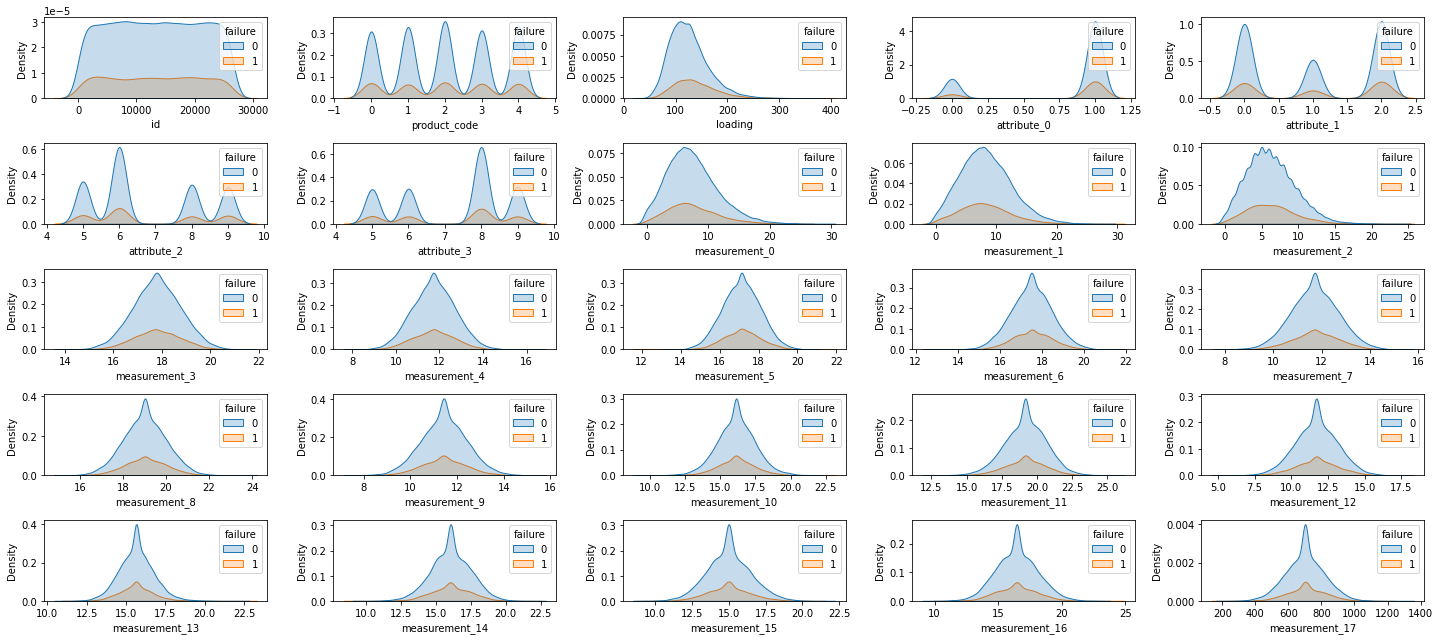

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 9), sharex = False, sharey = False)
axes = axes.ravel()  
cols = train_df.columns[:-1]

for col, ax in zip(cols, axes):
    data = train_df
    sns.kdeplot(data=data, x=col, shade=True, ax=ax, hue='failure')
    
fig.tight_layout()
plt.show()

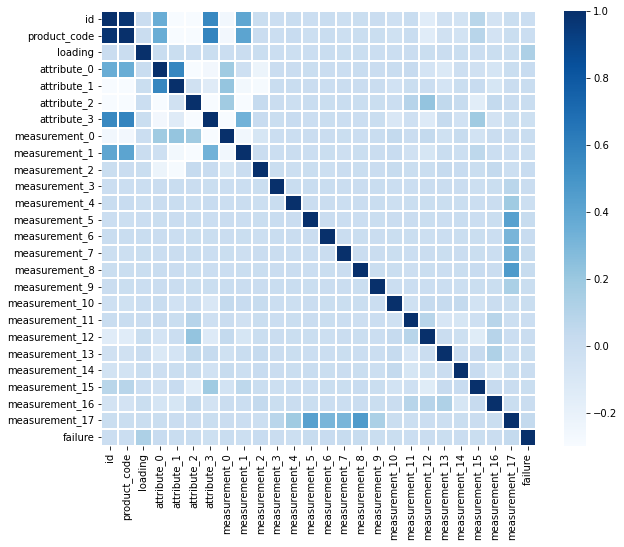

In [20]:
plt.figure(figsize = (10,8))
corr = train_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues", square=True, robust=True)
plt.show()

In [21]:
train_df.groupby('product_code').std()

,id,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
product_code,,,,,,,,,,,,,,,,,,,,,
0,1472.387517,38.905312,0.0,0.0,0.0,0.0,4.230892,2.723428,2.884531,0.991760,...,0.969058,0.970499,1.591796,1.385481,0.964919,1.497501,1.538540,1.571236,102.072026,0.419100
1,1515.688787,38.179101,0.0,0.0,0.0,0.0,3.323625,4.206832,3.084414,1.002664,...,0.987402,1.519131,1.686447,0.975982,1.562194,0.959169,1.575097,1.657260,103.822926,0.400324
2,1664.356482,39.444323,0.0,0.0,0.0,0.0,4.519530,3.296787,3.212603,0.998376,...,0.972892,0.964048,1.473035,1.520792,0.981329,1.686562,1.563092,1.764523,114.221828,0.408494
3,1475.851619,39.015796,0.0,0.0,0.0,0.0,3.408803,4.034857,3.157005,0.987412,...,0.983230,1.666727,0.952770,1.492178,0.964787,1.339725,1.533173,1.482140,131.721592,0.412605
4,1542.535575,38.628847,0.0,0.0,0.0,0.0,3.040499,3.950099,3.360730,0.989213,...,0.966981,1.521415,1.462215,1.565918,0.949395,1.548656,0.971663,1.612666,133.793663,0.405193


In [22]:
test_df.groupby('product_code').std()

,id,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
product_code,,,,,,,,,,,,,,,,,,,,,
0,1565.340911,38.101887,0.0,0.0,0.0,0.0,4.077055,4.598440,4.634429,0.997059,...,0.977881,0.994636,1.574621,1.097936,0.972722,1.639852,0.971933,1.340192,1.568673,158.202891
1,1474.408243,39.367998,0.0,0.0,0.0,0.0,3.558911,3.641097,2.782587,0.990904,...,0.989502,0.964523,1.699335,1.717060,0.978765,0.970972,1.571847,1.690143,1.542470,128.874143
2,1448.716156,39.336999,0.0,0.0,0.0,0.0,3.361828,3.170009,3.279425,1.001334,...,0.985321,0.985719,1.667937,1.532563,1.666695,0.974557,0.958219,1.640663,1.482656,109.563765
3,1509.337934,39.006323,0.0,0.0,0.0,0.0,3.853702,3.353793,3.117778,0.987468,...,0.986558,0.966163,0.973069,1.550870,1.466657,1.388650,1.704883,0.969699,1.614849,89.621614


In [23]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_train_data = scaler.fit_transform(train_df)
scaled_test_data = scaler.fit_transform(test_df)

In [24]:
scaled_train_data

array([[-1.73198562, -1.43720607, -1.22862532, ..., -1.08360615,
         0.53299429, -0.51963042],
       [-1.73185524, -1.43720607, -1.10531545, ..., -0.5060413 ,
        -0.16297571, -0.51963042],
       [-1.73172487, -1.43720607, -1.16864369, ...,  0.90585164,
        -0.32144646, -0.51963042],
       ...,
       [ 1.73172487,  1.41850477, -0.31422732, ..., -1.46112741,
         0.41647193, -0.51963042],
       [ 1.73185524,  1.41850477, -0.55209437, ..., -2.19299416,
         0.24504766, -0.51963042],
       [ 1.73198562,  1.41850477,  0.08685153, ...,  0.87169786,
        -0.83909552, -0.51963042]])

## Modeling

In [25]:
from sklearn.model_selection import train_test_split

X = train_df[train_df.columns[:-1]]
y = train_df['failure']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,y_train)
log_pred_score =round(log_score*100,2)
print(log_pred_score)

78.75


### DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,y_train)
pred_decision=model_decision.predict(X_test)
decision_score =model_decision.score(X_train,y_train)
decision_pred_score =round(decision_score*100,2)
print(decision_pred_score)

100.0


### XGB

In [28]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, np.ravel(y_train))

predict_xgb = xgb_model.predict_proba(X_test)
predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
xgb_probability = pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)
xgb_probability.head()

,Default Probability,failure
0,0.049898,0
1,0.274567,1
2,0.289055,1
3,0.088347,0
4,0.344351,0


In [29]:
feat_importance = xgb_model.get_booster().get_score(importance_type='weight')
feature_importance_rank = dict(sorted(feat_importance.items(), key=lambda item: item[1]))
feature_importance_rank 

{'attribute_2': 6.0,
 'attribute_3': 6.0,
 'attribute_0': 7.0,
 'attribute_1': 14.0,
 'measurement_2': 70.0,
 'measurement_0': 75.0,
 'measurement_1': 88.0,
 'measurement_16': 169.0,
 'measurement_13': 175.0,
 'measurement_6': 178.0,
 'measurement_7': 180.0,
 'measurement_3': 184.0,
 'measurement_12': 184.0,
 'measurement_9': 187.0,
 'id': 189.0,
 'measurement_14': 189.0,
 'measurement_17': 191.0,
 'loading': 196.0,
 'measurement_5': 196.0,
 'measurement_15': 196.0,
 'measurement_10': 201.0,
 'measurement_11': 203.0,
 'measurement_4': 218.0,
 'measurement_8': 218.0}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

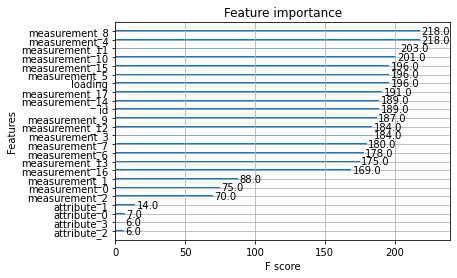

In [30]:
xgb.plot_importance(xgb_model,importance_type='weight')

In [31]:
pred_xgb=xgb_model.predict(X_test)
xgb_score =xgb_model.score(X_train,y_train)
xgb_pred_score =round(xgb_score*100,2)
print(xgb_pred_score)

87.69


### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)
pred_knn=model_knn.predict(X_test)
knn_score =model_knn.score(X_train,y_train)
knn_pred_score =round(knn_score*100,2)
print(knn_pred_score)

80.54


### Catboost

In [33]:
import catboost as cat

model_catboost = cat.CatBoostClassifier(iterations=10000,learning_rate=0.005,eval_metric='Recall')
model_catboost.fit(X_train,y_train, early_stopping_rounds=1000, verbose=1000)

0:	learn: 0.0012652	total: 166ms	remaining: 27m 35s
1000:	learn: 0.0000000	total: 14.3s	remaining: 2m 8s
2000:	learn: 0.0068320	total: 27.6s	remaining: 1m 50s
3000:	learn: 0.0220142	total: 41.3s	remaining: 1m 36s
4000:	learn: 0.0379555	total: 55s	remaining: 1m 22s
5000:	learn: 0.0602227	total: 1m 10s	remaining: 1m 10s
6000:	learn: 0.0923583	total: 1m 25s	remaining: 56.7s
7000:	learn: 0.1265182	total: 1m 39s	remaining: 42.6s
8000:	learn: 0.1594130	total: 1m 54s	remaining: 28.5s
9000:	learn: 0.1920547	total: 2m 10s	remaining: 14.5s
9999:	learn: 0.2350709	total: 2m 26s	remaining: 0us


In [34]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_test,y_test)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

78.69

###  GradientBoosting

In [35]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

model_gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
pred_gbdt = model_gbdt.predict(X_test)
gbdt_score = model_gbdt.score(X_test, y_test)
gbdt_pred_score  =round(gbdt_score*100,2)
gbdt_pred_score

78.53

### LinearDiscriminant

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)
pred_lda=model_lda.predict(X_test)
lda_score =model_lda.score(X_train,y_train)
lda_pred_score =round(lda_score*100,2)
print(lda_pred_score)

78.74


### GaussianNB

In [37]:
from sklearn.naive_bayes import GaussianNB

model_gnb =GaussianNB()
model_gnb.fit(X_train,y_train)
pred_gnb=model_gnb.predict(X_test)
gnb_score =model_gnb.score(X_train,y_train)
gnb_pred_score =round(gnb_score*100,2)
print(gnb_pred_score)

78.24


###  RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_rfc =RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train,y_train)
pred_rfc=model_rfc.predict(X_test)
rfc_score =model_rfc.score(X_train,y_train)
rfc_pred_score =round(rfc_score*100,2)
print(rfc_pred_score)

78.75


###  VotingClassifier

In [39]:
from sklearn.ensemble import VotingClassifier

lr1 = LogisticRegression(multi_class='multinomial', random_state=1)
rfc2 = RandomForestClassifier(n_estimators=50, random_state=1)
gnb3 = GaussianNB()
model_vtc = VotingClassifier(estimators=[('lr', lr1), ('rf', rfc2), ('gnb', gnb3)], voting='soft')

model_vtc.fit(X_train,y_train)
pred_vtc=model_vtc.predict(X_test)
vtc_score =model_vtc.score(X_train,y_train)
vtc_pred_score =round(vtc_score*100,2)
print(vtc_pred_score)

80.04


## Result

In [40]:
from sklearn.metrics import classification_report

print('Logistic Regression')
print(classification_report(y_test,pred_log))

print('Decision Tree')
print(classification_report(y_test,pred_decision))

print('XGBoost')
print(classification_report(y_test,pred_xgb))

print('KNN')
print(classification_report(y_test,pred_knn))

print('CatBoost')
print(classification_report(y_test,pred_catboost))

print('GradientBoosting')
print(classification_report(y_test,pred_gbdt))

print('LinearDiscriminant')
print(classification_report(y_test,pred_lda))

print('GaussianNB')
print(classification_report(y_test,pred_gnb))
      
print('Random Forest')
print(classification_report(y_test,pred_rfc))
      
print('Voting Classifier')
print(classification_report(y_test,pred_vtc))

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6274
           1       0.40      0.00      0.00      1697

    accuracy                           0.79      7971
   macro avg       0.59      0.50      0.44      7971
weighted avg       0.70      0.79      0.69      7971

Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      6274
           1       0.21      0.23      0.22      1697

    accuracy                           0.65      7971
   macro avg       0.50      0.50      0.50      7971
weighted avg       0.66      0.65      0.66      7971

XGBoost
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      6274
           1       0.25      0.03      0.05      1697

    accuracy                           0.77      7971
   macro avg       0.52      0.50      0.46      7971
weighted avg       0.67      0.7

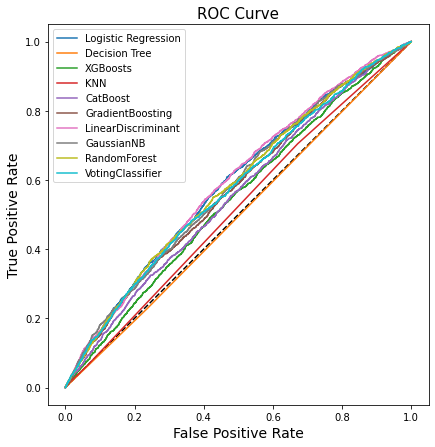

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')

model_log_proba=model_log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_log_proba)
plt.plot(fpr, tpr, label='Logistic Regression')

model_decision_proba=model_decision.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_decision_proba)
plt.plot(fpr, tpr, label='Decision Tree')

xgb_model_proba=xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,xgb_model_proba)
plt.plot(fpr, tpr, label='XGBoosts')

model_knn_proba=model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_knn_proba)
plt.plot(fpr, tpr, label='KNN')

model_catboost_proba=model_catboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_catboost_proba)
plt.plot(fpr, tpr, label='CatBoost')

model_gbdt_proba=model_gbdt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_gbdt_proba)
plt.plot(fpr, tpr, label='GradientBoosting')

model_lda_proba=model_lda.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_lda_proba)
plt.plot(fpr, tpr, label='LinearDiscriminant')

model_gnb_proba=model_gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_gnb_proba)
plt.plot(fpr, tpr, label='GaussianNB')

model_rfc_proba=model_rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_rfc_proba)
plt.plot(fpr, tpr, label='RandomForest')

model_vtc_proba=model_vtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_vtc_proba)
plt.plot(fpr, tpr, label='VotingClassifier')


plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)
plt.legend()

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cluster

print(accuracy_score(y_test, pred_log))
log_table = cluster.contingency_matrix(y_test, pred_log)
print(log_table)

0.7869777945050809
[[6271    3]
 [1695    2]]


<AxesSubplot:>

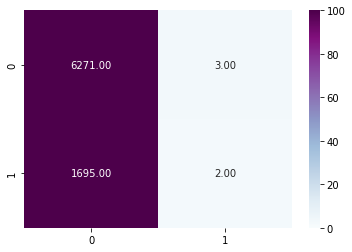

In [43]:
sns.heatmap(log_table, annot=True, fmt='.2f',cmap="BuPu", vmin=0.0, vmax=100.0)

In [44]:
log_prediction = model_log.predict_proba(test_df)[:,1]

labels = test_df['id']
log_submission = pd.DataFrame(np.array([labels, log_prediction]).T,
                                 columns = ['id', 'failure'])
log_submission['id'] = log_submission['id'].astype(int)
log_submission.head()

,id,failure
0,26570,0.188167
1,26571,0.173586
2,26572,0.183911
3,26573,0.184001
4,26574,0.321598


In [45]:
log_submission.to_csv('log_submission.csv', index=False)